In [1]:
# libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# data
from data.data import data
from data.sys_data import sys_data 

# setup
sns.set_theme(style="whitegrid")
sns.set(color_codes=True)

In [2]:
# get data
raw_dataset = data.parse_data('../test_data.txt')
df = pd.DataFrame(raw_dataset)

print("Peak Bandwidth: ", sys_data.peak_theoretical_bandwidth, "GB/s")
print(raw_dataset)

Peak Bandwidth:  42.94967296 GB/s
              name    space           min           max          mean  \
0         Sum slow    10000  1.711400e-05  3.503000e-05  1.863640e-05   
1       Sum arrays      400  2.060000e-07  3.800000e-07  2.162790e-07   
2       Sum arrays     4000  1.933000e-06  5.065000e-06  2.003780e-06   
3       Sum arrays    40000  1.970500e-05  1.052500e-04  2.009750e-05   
4  Matrix multiply  4000000  3.031460e-03  5.156520e-03  3.048010e-03   
5   Insertion sort       40  1.380000e-07  4.130000e-07  1.474110e-07   
6   Insertion sort      400  1.134800e-05  1.980800e-05  1.248800e-05   
7   Insertion sort     4000  1.107250e-03  1.395330e-03  1.111460e-03   

             sd  
0  1.289180e-06  
1  5.494280e-09  
2  1.430580e-07  
3  2.833570e-06  
4  1.062230e-04  
5  9.633490e-09  
6  1.520660e-06  
7  1.277590e-05  


In [3]:
df_sort = df.loc[df.name == 'Insertion sort'].copy()

# calculate median
df_sort['median'] = df_sort.apply(lambda row: (row['min'] + row['max'])/2, axis=1)
print(df_sort)

             name  space           min           max          mean  \
5  Insertion sort     40  1.380000e-07  4.130000e-07  1.474110e-07   
6  Insertion sort    400  1.134800e-05  1.980800e-05  1.248800e-05   
7  Insertion sort   4000  1.107250e-03  1.395330e-03  1.111460e-03   

             sd        median  
5  9.633490e-09  2.755000e-07  
6  1.520660e-06  1.557800e-05  
7  1.277590e-05  1.251290e-03  


TypeError: seaborn.utils._scatter_legend_artist() got multiple values for keyword argument 'label'

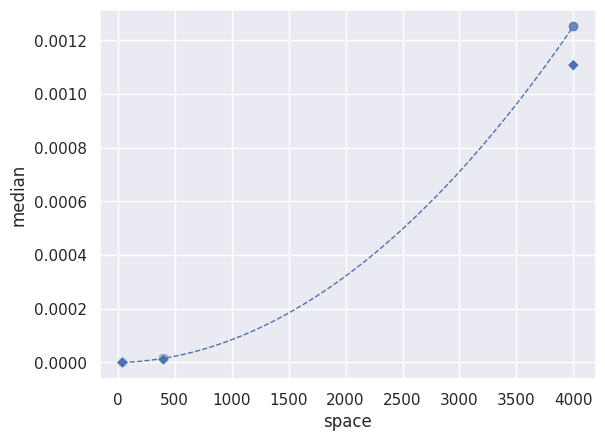

In [6]:
sns.regplot(
    data=df_sort, label="Median",
    x="space", y="median",
    ci=None, order=2, line_kws={"ls":"--", "linewidth":1},
)
sns.scatterplot(
    data=df_sort, hue='name', marker='D',
    x="space", y="min", label='min'
)
sns.scatterplot(
    data=df_sort, hue='name', marker='D',
    x="space", y="max",
)
sns.scatterplot(
    data=df_sort, hue='name', marker='x',
    x="space", y="mean",
)
plt.title('Insertion Sort')
plt.xlabel('Input Size (bytes)')
plt.ylabel('Time (s)')
plt.xscale('log')
plt.yscale('log')
plt.show()